In [27]:
#import required libraries
import pandas as pd

In [28]:
#get the sentiment dataset
df_sentiment = pd.read_csv('imdb_labelled.txt',sep='\t',names=['comment','label'])

In [29]:
#view first 10 observations. 
# 1 indicates positive sentiment and 0 indicate negative sentiment
df_sentiment.head(10)

,comment,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [30]:
# view more information about the setiment data using describe method
df_sentiment.describe()

,label
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [31]:
#view more info on data
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  748 non-null    object
 1   label    748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [7]:
# view data using group by and describe method
df_sentiment.groupby('label').describe()

comment                                
        count unique                 top freq
label                                        
0         362    361  Not recommended.      2
1         386    384             10/10      2

In [32]:
# Verify length of the messages and also add it also as a new column (feature)
df_sentiment['length'] =df_sentiment['comment'].apply(len)

In [33]:
# view first 5 messages with length
df_sentiment.head()

,comment,label,length
0,"A very, very, very slow-moving, aimless movie ...",0,87
1,Not sure who was more lost - the flat characte...,0,99
2,Attempting artiness with black & white and cle...,0,188
3,Very little music or anything to speak of.,0,44
4,The best scene in the movie was when Gerardo i...,1,108


In [34]:
#view first 
df_sentiment[df_sentiment['length']>50]['comment'].iloc[0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [35]:
# start text processing with vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [36]:
# define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    # Check characters to see if there are punctuations
    no_punctuation = [char for char in mess if char not in string.punctuation]
    # now form the sentence.
    no_punctuation = ''.join(no_punctuation)
    # Now eliminate any stopwords
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [40]:
# bag of words by applying the function and fit the data (comment) into it
import string
from nltk.corpus import stopwords
bag_of_words = CountVectorizer(analyzer=message_text_process).fit(df_sentiment['comment'])

In [41]:
# apply transform method for the bag of words
comment_bagofwords = bag_of_words.transform(df_sentiment['comment'])

In [15]:
# apply tfidf transformer and fit the bag of words into it (transformed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(comment_bagofwords)

In [17]:
# print shape of the tfidf 
comment_tfidf = tfidf_transformer.transform(comment_bagofwords)
print(comment_tfidf.shape)

(748, 3259)


In [18]:
#choose naive Bayes model to detect the spam and fit the tfidf data into it
from sklearn.naive_bayes import MultinomialNB
sentiment_detection_model = MultinomialNB().fit(comment_tfidf,df_sentiment['label'])

In [20]:
# check model for the predicted  and expected value say for comment# 1 and comment#5
comment = df_sentiment['comment'][4]
bag_of_words_for_comment = bag_of_words.transform([comment])
tfidf = tfidf_transformer.transform(bag_of_words_for_comment)

print('predicted sentiment label ', sentiment_detection_model.predict(tfidf)[0])
print('expected sentiment label', df_sentiment.label[4])

predicted sentiment label  1
expected sentiment label 1


### Matplotlib

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [47]:
#to show the plot on notebook use
%matplotlib inline

In [56]:
flights_data=sns.load_dataset('flights')
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [53]:
#to rearrange the dataset use pivot
flights_data=flights_data.pivot('year', 'month', 'passengers')
flights_data

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

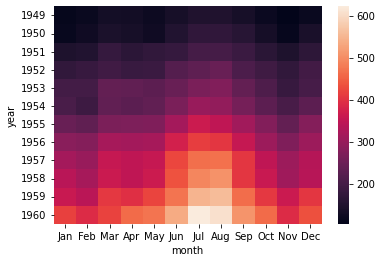

In [54]:
sns.heatmap(flights_data)

In [57]:
flights_data=flights_data.pivot('month','year','passengers')
flights_data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

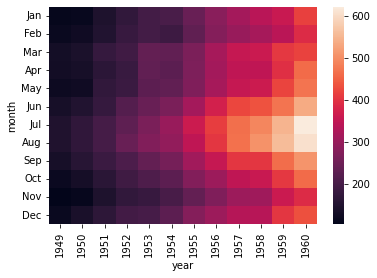

In [58]:
sns.heatmap(flights_data)

### Error bar 
- is used to shown the variability in the data